In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from PIL import Image
import os

In [15]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [16]:
# Preprocess the data
# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape images to 1D arrays (28x28 = 784 features)
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Convert labels to one-hot encoded format for multi-class classification
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [17]:
# Build the neural network
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))  # Hidden layer, input_dim=784 (28x28)
model.add(Dense(64, activation='relu'))  # Additional hidden layer
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8660 - loss: 0.4654 - val_accuracy: 0.9587 - val_loss: 0.1393
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9626 - loss: 0.1204 - val_accuracy: 0.9647 - val_loss: 0.1180
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9776 - loss: 0.0731 - val_accuracy: 0.9698 - val_loss: 0.0997
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9845 - loss: 0.0525 - val_accuracy: 0.9717 - val_loss: 0.0981
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9855 - loss: 0.0456 - val_accuracy: 0.9732 - val_loss: 0.0952
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9889 - loss: 0.0343 - val_accuracy: 0.9734 - val_loss: 0.0897
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9916 - loss: 0.0271 - val_accuracy: 0.9749 - val_loss: 0.1033
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9925 - loss: 0.0224 - 

In [20]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9716 - loss: 0.1066
Test Accuracy: 0.9769


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


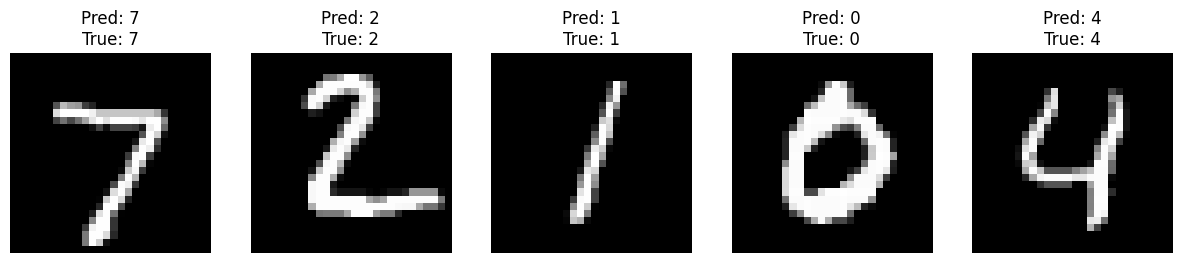

In [21]:
# Make predictions on a few test samples
num_samples = 5
test_samples = X_test[:num_samples]
true_labels = np.argmax(y_test[:num_samples], axis=1)
predictions = model.predict(test_samples)
predicted_labels = np.argmax(predictions, axis=1)

# Visualize predictions
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(test_samples[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}')
    plt.axis('off')
plt.show()

In [22]:
# Function to preprocess and predict on a custom image
def predict_custom_image(image_path):
    # Load the image
    try:
        img = Image.open(image_path)  # Load image
        img = img.convert('L')  # Convert to grayscale
        img = img.resize((28, 28))  # Resize to 28x28 pixels
    except Exception as e:
        print(f"Error loading or processing image: {e}")
        return None, None, None

    # Convert to numpy array and normalize
    img_array = np.array(img).astype('float32') / 255.0

    # Invert colors if necessary (MNIST has white digits on black background)
    if img_array.mean() > 0.5:  # Heuristic: light background
        img_array = 1.0 - img_array

    # Reshape for the model (1, 784)
    img_array = img_array.reshape(1, 28*28)

    # Make prediction
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction)

    return img_array, predicted_label, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


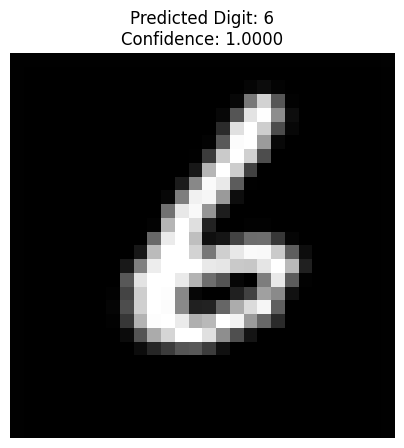

In [23]:
image_path = 'six.png'  # Replace with actual image path
if os.path.exists(image_path):
    img_array, predicted_label, confidence = predict_custom_image(image_path)
    if img_array is not None:
        # Visualize the input image and prediction
        plt.figure(figsize=(5, 5))
        plt.imshow(img_array.reshape(28, 28), cmap='gray')
        plt.title(f'Predicted Digit: {predicted_label}\nConfidence: {confidence:.4f}')
        plt.axis('off')
        plt.show()
else:
    print(f"Image file '{image_path}' not found. Please provide a valid image path.")
    print("Instructions: Download or create an image of a handwritten digit (0-9).")
    print("The image will be converted to 28x28 pixels and grayscale automatically.")
    print("For best results, use a white digit on a black background (like MNIST).")